In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib


In [2]:
path = r"C:\Users\Abhilash\Desktop\Data Trained\Flip Robo\Dataset\Malignant Comments Classifier Project\train.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    
    

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [3]:
train_df = pd.read_csv(path,encoding = 'utf-8')
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
path1 = r"C:\Users\Abhilash\Desktop\Data Trained\Flip Robo\Dataset\Malignant Comments Classifier Project\test.csv"
import chardet
with open (path1,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    
    

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [5]:
test_df = pd.read_csv(path1,encoding = 'utf-8')
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [9]:
test_df.isnull().sum()

id              0
comment_text    0
dtype: int64

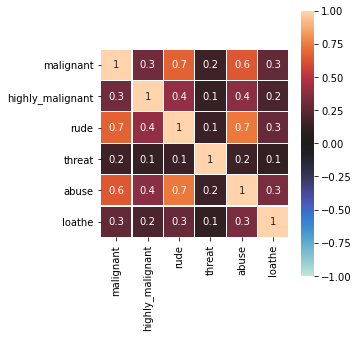

In [10]:
data_corr = train_df.corr().abs()

plt.figure(figsize = (5,5))
sns.heatmap(data_corr , vmin=-1 , vmax=1 , annot=True,
            square=True , center=0 , fmt = '.1g' , linewidths=.1)
plt.tight_layout()

In [11]:
train_df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant
0    144277
1     15294
Name: malignant, dtype: int64


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


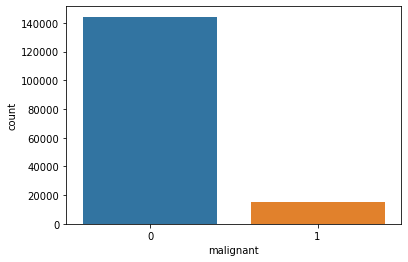

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


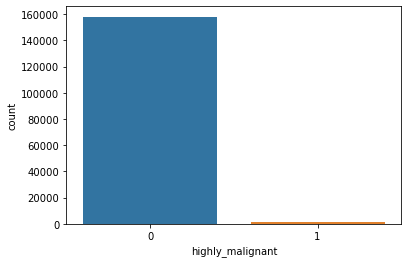

rude
0    151122
1      8449
Name: rude, dtype: int64


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


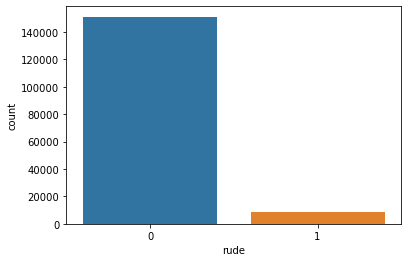

threat
0    159093
1       478
Name: threat, dtype: int64


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


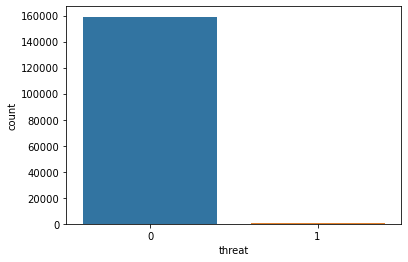

abuse
0    151694
1      7877
Name: abuse, dtype: int64


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


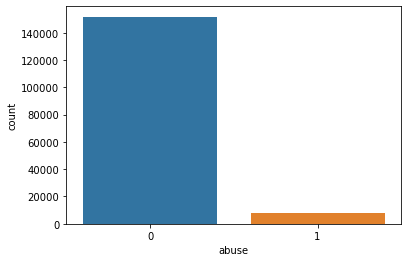

loathe
0    158166
1      1405
Name: loathe, dtype: int64


C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


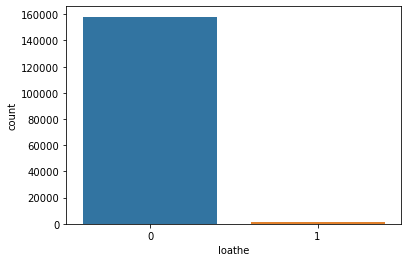

In [12]:
col = ['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in col:
    print(i)
    print(train_df[i].value_counts())
    sns.countplot(train_df[i])
    plt.show()

In [13]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [14]:
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+/\s+?$' , '')

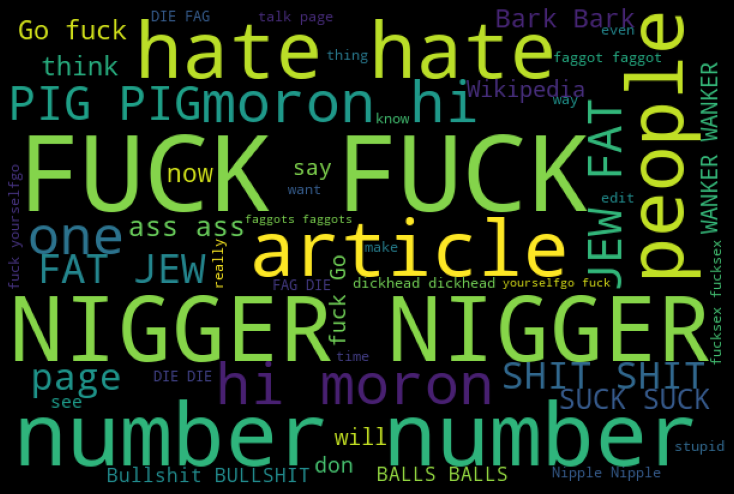

In [15]:
hams = train_df['comment_text'][train_df['malignant']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

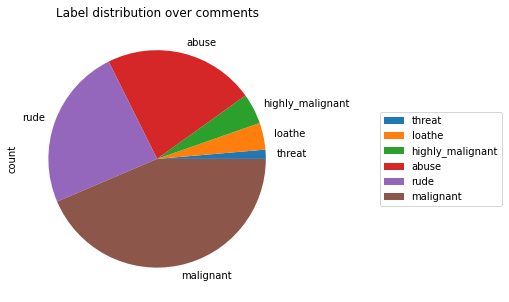

In [16]:
df_distribution = train_df[col].sum()\
                          .to_frame()\
                          .rename(columns={0: 'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count', 
                         title = 'Label distribution over comments', 
                         figsize=(5,5))\
.legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

In [17]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [18]:
for i in range(len(test_df['comment_text'])):
    test_df['comment_text'][i] = test_df['comment_text'][i].lower()
    j = []
    for word in test_df['comment_text'][i].split():
        j.append(lemmatizer.lemmatize(word, pos="v"))
        test_df['comment_text'][i] = "".join(j)

KeyboardInterrupt: 

In [ ]:
for i in range(len(train_df['comment_text'])):
    train_df['comment_text'][i] = train_df['comment_text'][i].lower()
    j = []
    for word in train_df['comment_text'][i].split():
        j.append(lemmatizer.lemmatize(word, pos="v"))
        train_df['comment_text'][i] = "".join(j)

In [ ]:
x = train_df.drop(['malignant'],axis=1)
y = train_df['malignant']

In [ ]:
naive = MultinomialNB()

In [ ]:
tf_vec = TfidfVectorizer()

In [ ]:
comment = train_df['comment_text']

In [ ]:
x = tf_vec.fit_transform(comment)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)
naive.fit(x_train,y_train)

In [ ]:
y_pred = naive.predict(x_test)

In [ ]:
joblib.dump(y_pred, "model")

In [ ]:
y_pred